In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hg14-handgesture14-dataset/HG14/Read.docx

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11925.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11378.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11138.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11868.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11034.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11251.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11617.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11921.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11236.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11522.jpg

/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture/Gesture_11/11529.jp

# 1. Exploratory Data Analysis 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def load_images_kaggle():
    images = []
    labels = []

    root_path = '/kaggle/input/hg14-handgesture14-dataset/HG14/'

    for label in range(14):  
        gesture_folder = f'Gesture_{label}'
        gesture_path = os.path.join(root_path, 'HG14-Hand Gesture', gesture_folder)
        
        for dirname, _, filenames in os.walk(gesture_path):
            for filename in filenames:
                if filename.endswith('.jpg'):  
                    filepath = os.path.join(dirname, filename)
                    images.append(filepath)
                    labels.append(label)

    data = pd.DataFrame({'Image': images, 'Label': labels})
    return data

In [5]:
data = load_images_kaggle()

print("Shape of the dataset:", data.shape)
print("Number of unique labels:", data['Label'].nunique())

Shape of the dataset: (14000, 2)

Number of unique labels: 14


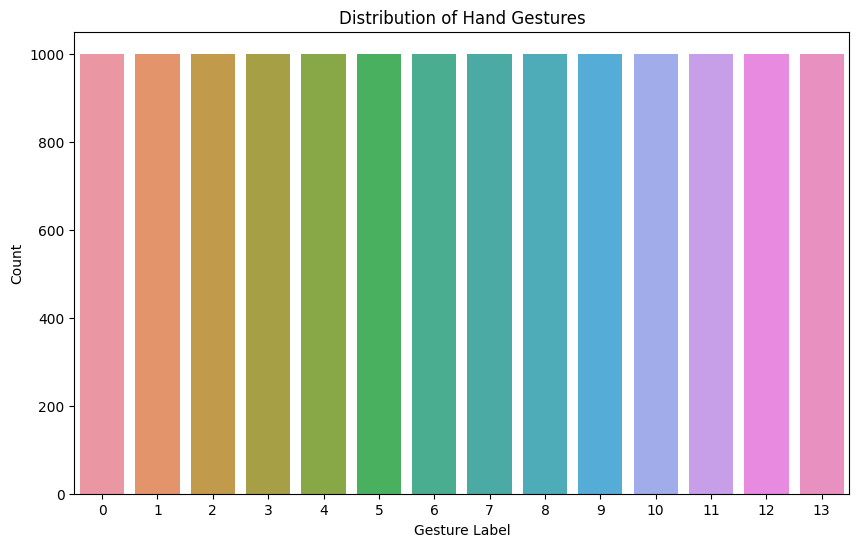

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=data)
plt.title('Distribution of Hand Gestures')
plt.xlabel('Gesture Label')
plt.ylabel('Count')
plt.show()

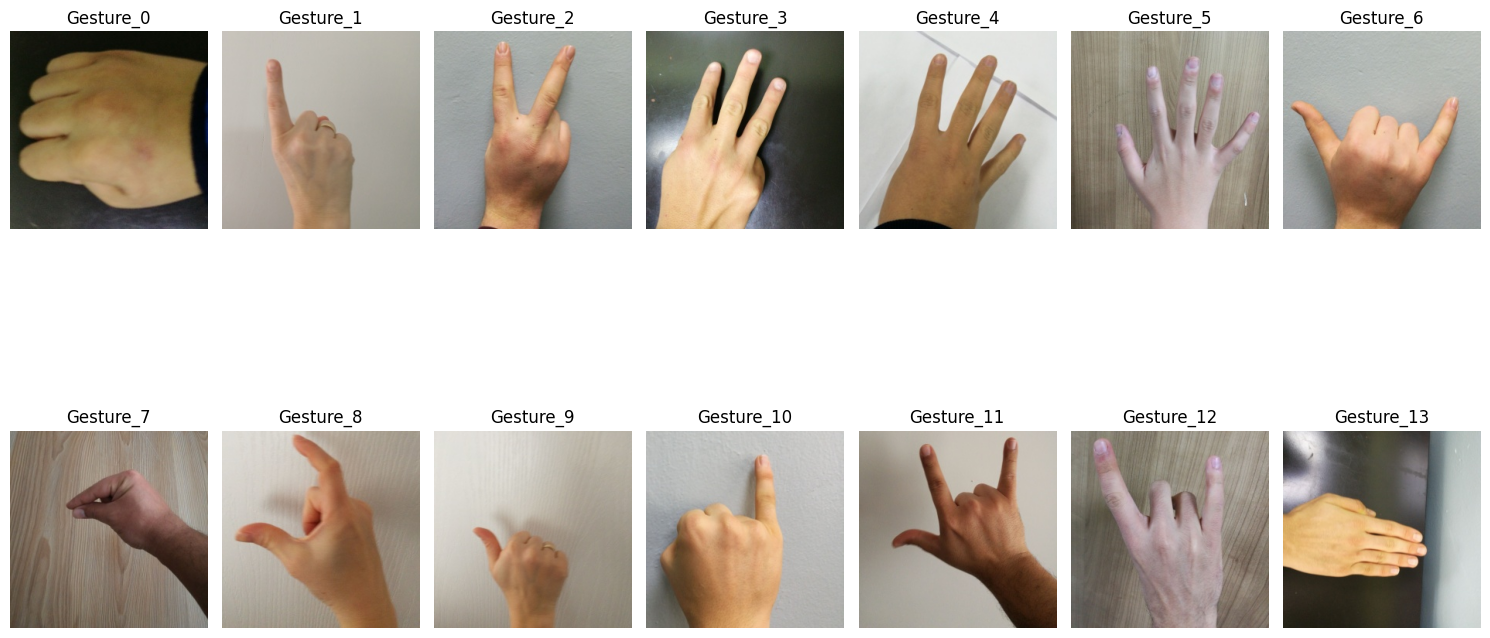

In [7]:
nrows, ncols = 2, 7
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    if i < data['Label'].nunique():
        sample_image = data[data['Label'] == i]['Image'].iloc[0]
        img = plt.imread(sample_image)
        ax.imshow(img)
        ax.set_title(f'Gesture_{i}')
        ax.axis('off')
plt.tight_layout()
plt.show()

# 2. CNN Model 

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [7]:
def create_data_generators(data_dir, batch_size=32, image_size=(256, 256)):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    val_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    return train_generator, val_generator

In [8]:
data_dir = '/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture'

In [9]:
train_generator, val_generator = create_data_generators(data_dir)

Found 11200 images belonging to 14 classes.

Found 2800 images belonging to 14 classes.


In [12]:
num_classes = 14  
output_units = num_classes  

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(output_units, activation='softmax')  
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
epochs = 10
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // val_generator.batch_size)

Epoch 1/10

350/350 [==============================] - 148s 379ms/step - loss: 2.6712 - accuracy: 0.0903 - val_loss: 2.5779 - val_accuracy: 0.1160

Epoch 2/10

350/350 [==============================] - 39s 110ms/step - loss: 2.1967 - accuracy: 0.2760 - val_loss: 1.9677 - val_accuracy: 0.3746

Epoch 3/10

350/350 [==============================] - 39s 111ms/step - loss: 1.3530 - accuracy: 0.5620 - val_loss: 1.5552 - val_accuracy: 0.4899

Epoch 4/10

350/350 [==============================] - 39s 111ms/step - loss: 0.7627 - accuracy: 0.7500 - val_loss: 1.4660 - val_accuracy: 0.5506

Epoch 5/10

350/350 [==============================] - 38s 109ms/step - loss: 0.4493 - accuracy: 0.8507 - val_loss: 1.5527 - val_accuracy: 0.5593

Epoch 6/10

350/350 [==============================] - 39s 111ms/step - loss: 0.2946 - accuracy: 0.9047 - val_loss: 1.5483 - val_accuracy: 0.5851

Epoch 7/10

350/350 [==============================] - 43s 122ms/step - loss: 0.2154 - accuracy: 0.9328 - val_loss: 1

In [16]:
accuracy = model.evaluate(val_generator)
print(f"Accuracy on validation set: {accuracy[1] * 100:.2f}%")

88/88 [==============================] - 9s 102ms/step - loss: 2.0815 - accuracy: 0.5818

Accuracy on validation set: 58.18%


# 3. Improving Model Performance 

## 3.1 Data Augmentation

In [17]:
def create_augmented_generators(data_dir, batch_size=32, image_size=(256, 256)):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    val_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_generator, val_generator

In [18]:
train_generator, val_generator = create_augmented_generators(data_dir)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15  
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Found 11200 images belonging to 14 classes.

Found 2800 images belonging to 14 classes.

Epoch 1/15

350/350 [==============================] - 212s 599ms/step - loss: 2.2916 - accuracy: 0.2807 - val_loss: 2.0968 - val_accuracy: 0.3229

Epoch 2/15

350/350 [==============================] - 209s 598ms/step - loss: 1.9894 - accuracy: 0.3405 - val_loss: 1.9059 - val_accuracy: 0.3754

Epoch 3/15

350/350 [==============================] - 213s 608ms/step - loss: 1.8691 - accuracy: 0.3751 - val_loss: 1.8545 - val_accuracy: 0.3671

Epoch 4/15

350/350 [==============================] - 212s 605ms/step - loss: 1.7540 - accuracy: 0.4036 - val_loss: 1.7607 - val_accuracy: 0.4260

Epoch 5/15

350/350 [==============================] - 211s 604ms/step - loss: 1.6903 - accuracy: 0.4251 - val_loss: 1.7479 - val_accuracy: 0.4134

Epoch 6/15

350/350 [==============================] - 211s 603ms/step - loss: 1.5986 - accuracy: 0.4579 - val_loss: 1.5966 - val_accuracy: 0.4573

Epoch 7/15

350/350 [==

In [19]:
accuracy = model.evaluate(val_generator)
print(f"Accuracy on validation set after data augmentation: {accuracy[1] * 100:.2f}%")

88/88 [==============================] - 42s 477ms/step - loss: 1.3463 - accuracy: 0.5396

Accuracy on validation set after data augmentation: 53.96%


## 3.2 Transfer Learning

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [22]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  
predictions = Dense(14, activation='softmax')(x)  

In [23]:
transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10  
history = transfer_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10

350/350 [==============================] - 226s 628ms/step - loss: 2.6450 - accuracy: 0.1467 - val_loss: 1.9539 - val_accuracy: 0.3610

Epoch 2/10

350/350 [==============================] - 224s 640ms/step - loss: 2.1253 - accuracy: 0.2204 - val_loss: 1.7968 - val_accuracy: 0.4677

Epoch 3/10

350/350 [==============================] - 220s 628ms/step - loss: 2.0523 - accuracy: 0.2430 - val_loss: 1.6893 - val_accuracy: 0.5341

Epoch 4/10

350/350 [==============================] - 219s 626ms/step - loss: 2.0096 - accuracy: 0.2502 - val_loss: 1.6507 - val_accuracy: 0.5169

Epoch 5/10

350/350 [==============================] - 223s 636ms/step - loss: 1.9762 - accuracy: 0.2640 - val_loss: 1.5358 - val_accuracy: 0.5600

Epoch 6/10

350/350 [==============================] - 217s 620ms/step - loss: 1.9568 - accuracy: 0.2737 - val_loss: 1.4340 - val_accuracy: 0.5564

Epoch 7/10

350/350 [==============================] - 218s 624ms/step - loss: 1.9617 - accuracy: 0.2704 - val_l

In [26]:
accuracy = transfer_model.evaluate(val_generator)
print(f"Accuracy on validation set after transfer learning: {accuracy[1] * 100:.2f}%")

88/88 [==============================] - 43s 491ms/step - loss: 1.4281 - accuracy: 0.6196

Accuracy on validation set after transfer learning: 61.96%


## 3.3 Hyperparameter Tuning

In [2]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in base_model.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [13]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  
predictions = Dense(14, activation='softmax')(x)  

In [16]:
transfer_model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
learning_rates = [0.001, 0.0001]
optimizers = [Adam, RMSprop]

best_accuracy = 0
best_lr = None
best_optimizer = None

In [18]:
for lr in learning_rates:
    for optimizer in optimizers:
        opt = optimizer(lr=lr)
        2
        transfer_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = transfer_model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // train_generator.batch_size,
            epochs=10, 
            validation_data=val_generator,
            validation_steps=val_generator.samples // val_generator.batch_size,
            verbose=0
        )
        
        accuracy = transfer_model.evaluate(val_generator, verbose=0)[1]
        
        print(f"LR: {lr}, Optimizer: {optimizer.__name__}, Accuracy: {accuracy * 100:.2f}%")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_optimizer = optimizer.__name__

print(f"Best LR: {best_lr}, Best Optimizer: {best_optimizer}, Best Accuracy: {best_accuracy * 100:.2f}%")

LR: 0.001, Optimizer: Adam, Accuracy: 89.11%

LR: 0.001, Optimizer: RMSprop, Accuracy: 89.75%

LR: 0.0001, Optimizer: Adam, Accuracy: 89.25%

LR: 0.0001, Optimizer: RMSprop, Accuracy: 88.54%

Best LR: 0.001, Best Optimizer: RMSprop, Best Accuracy: 89.75%


1/1 [==============================] - 0s 41ms/step


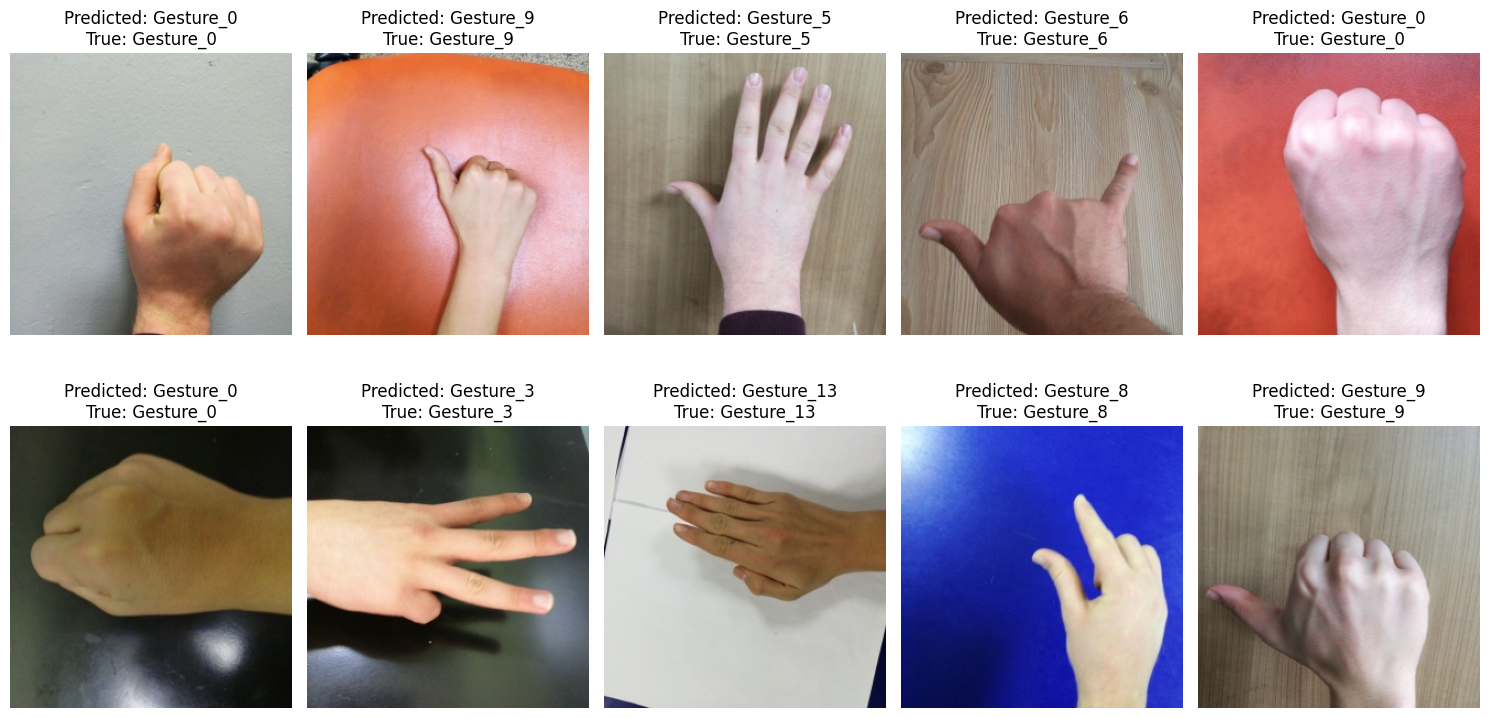

In [23]:
def plot_sample_images(generator, trained_model, num_samples=10):
    images, labels = next(generator)
    
    predictions = trained_model.predict(images)
    
    class_names = list(generator.class_indices.keys())
    decoded_predictions = [class_names[np.argmax(pred)] for pred in predictions]
    decoded_labels = [class_names[np.argmax(label)] for label in labels]
    
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Predicted: {decoded_predictions[i]}\nTrue: {decoded_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(val_generator, transfer_model)

# 4. Comparing Accuracy of Models

In [24]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [25]:
from tabulate import tabulate

data = [
    ["Base CNN Model", 58.18],
    ["Data Augmentation", 53.96],
    ["Transfer Learning", 62.61],
    ["Hyperparameter Tuning", 89.75]
]

headers = ["Model", "Accuracy (%)"]

table = tabulate(data, headers=headers, tablefmt="github")
print(table)

| Model                 |   Accuracy (%) |

|-----------------------|----------------|

| Base CNN Model        |          58.18 |

| Data Augmentation     |          53.96 |

| Transfer Learning     |          62.61 |

| Hyperparameter Tuning |          89.75 |


# 5. Evaluating Best Performing Model on Test Dataset 

In [27]:
def create_train_val_test_generators(data_dir, batch_size=32, image_size=(256, 256)):
    train_val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = train_val_datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_generator = train_val_datagen.flow_from_directory(
        data_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)  
    test_generator = test_datagen.flow_from_directory(
        data_dir,  
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  
    )

    return train_generator, val_generator, test_generator

data_dir = '/kaggle/input/hg14-handgesture14-dataset/HG14/HG14-Hand Gesture'
train_generator, val_generator, test_generator = create_train_val_test_generators(data_dir)

Found 11200 images belonging to 14 classes.

Found 2800 images belonging to 14 classes.

Found 14000 images belonging to 14 classes.


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_predictions = transfer_model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes  

test_accuracy = accuracy_score(test_true_labels, test_pred_labels)
test_precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
test_recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
test_f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

438/438 [==============================] - 72s 164ms/step

Test Accuracy: 97.53%

Test Precision: 0.9756

Test Recall: 0.9753

Test F1 Score: 0.9752
